In [2]:
import torch
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

c:\Users\max.p\Anaconda3\envs\NLP\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


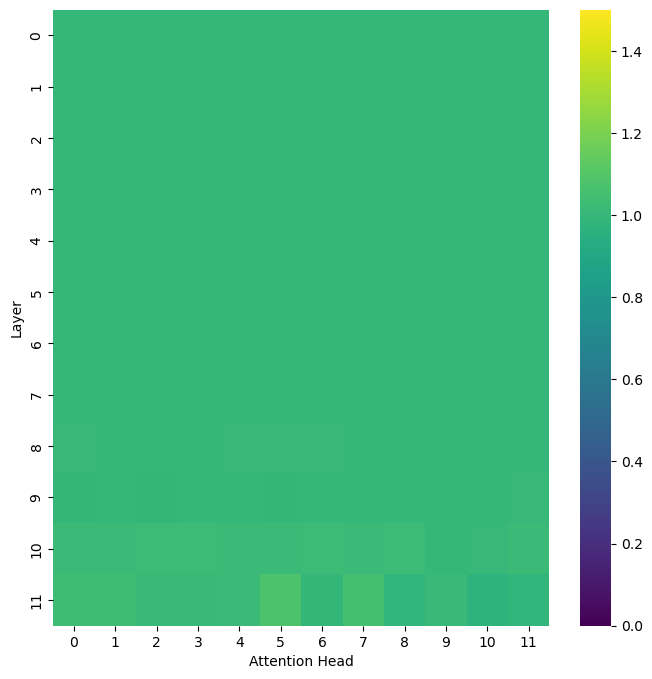

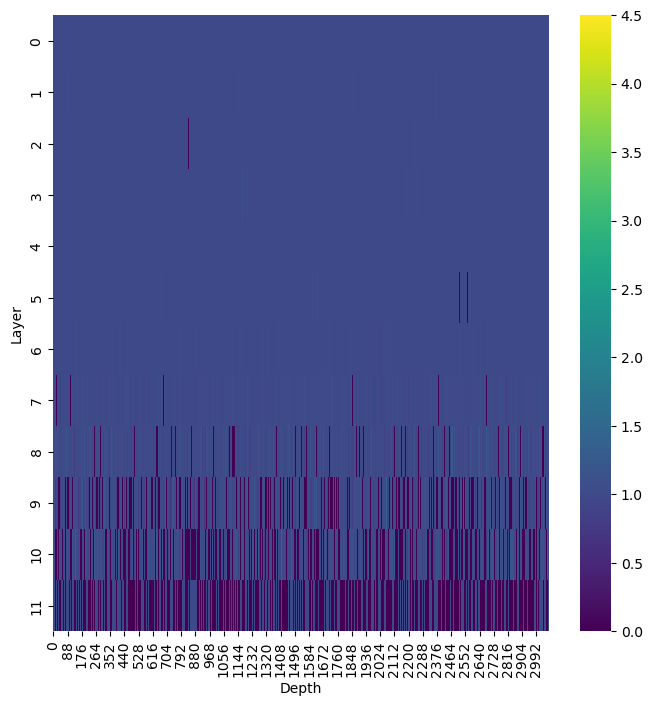

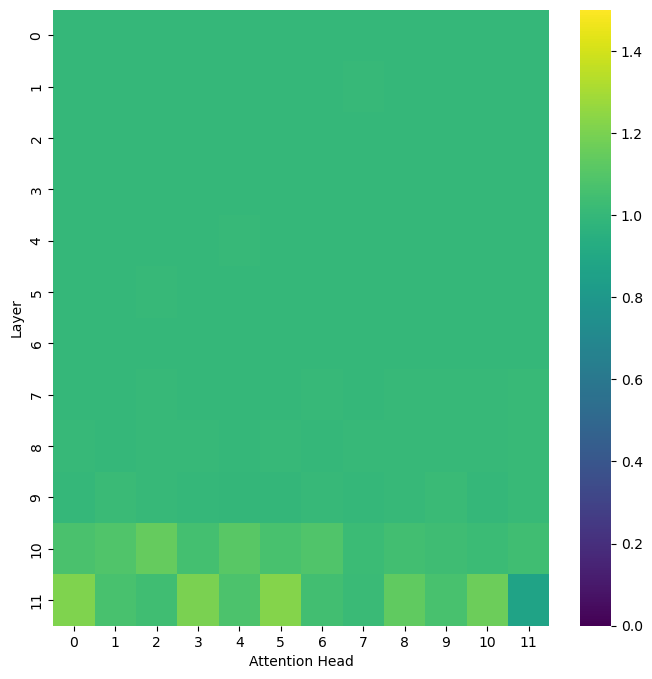

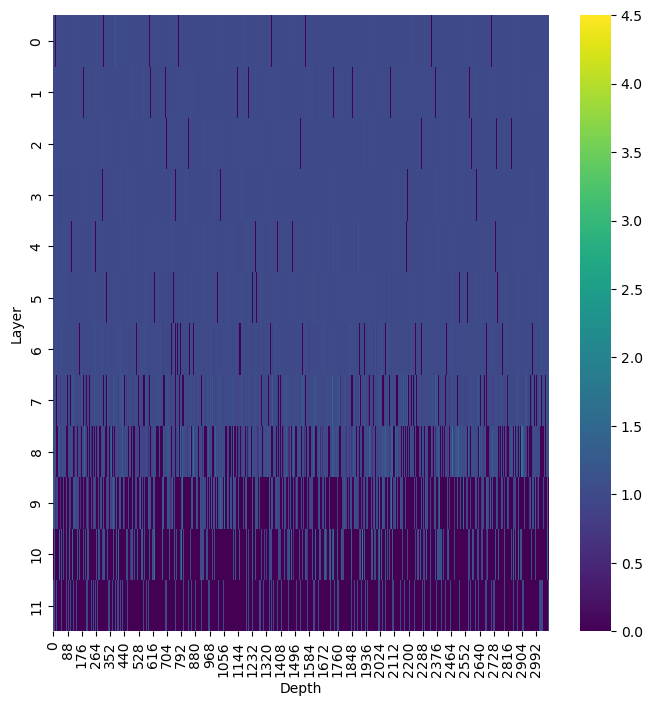

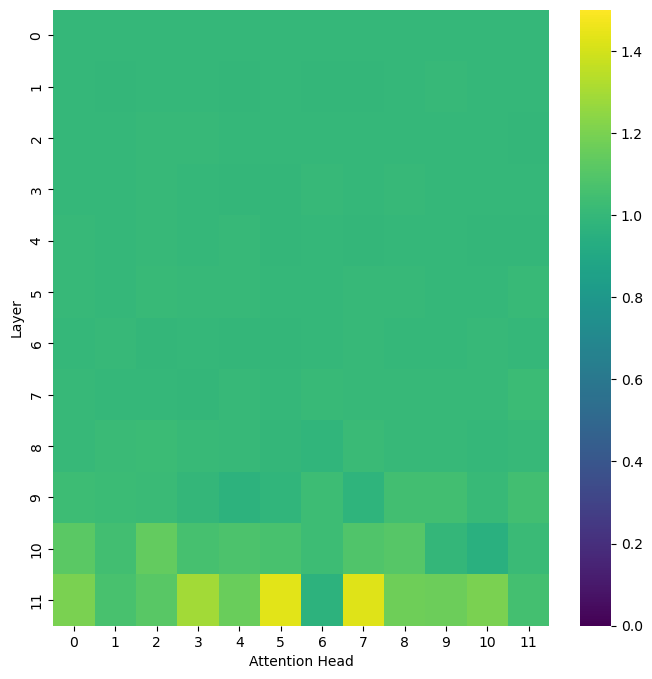

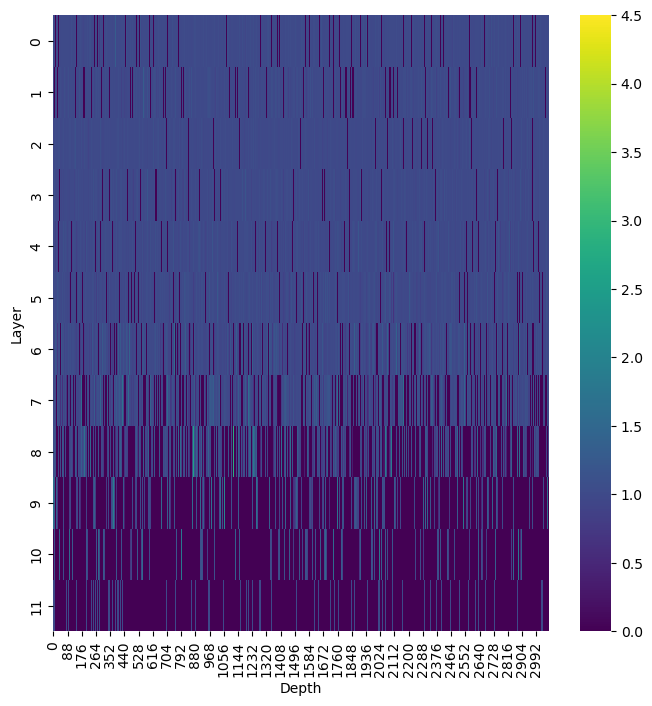

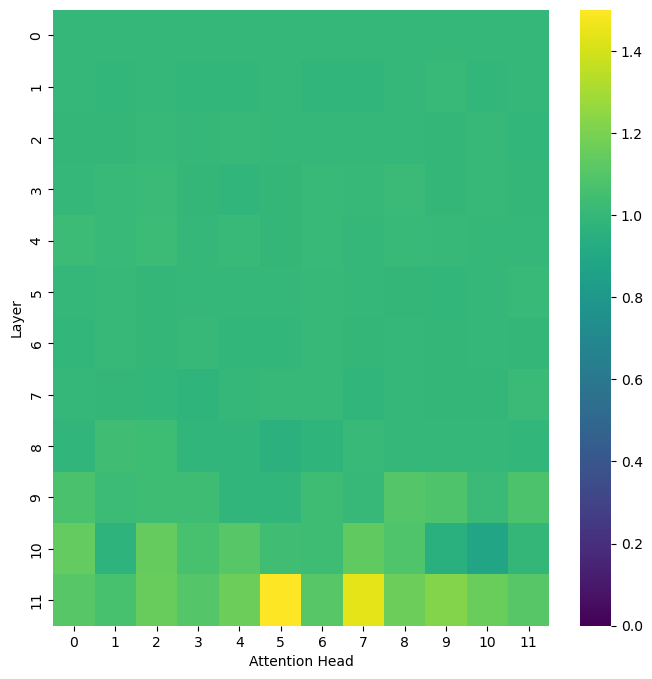

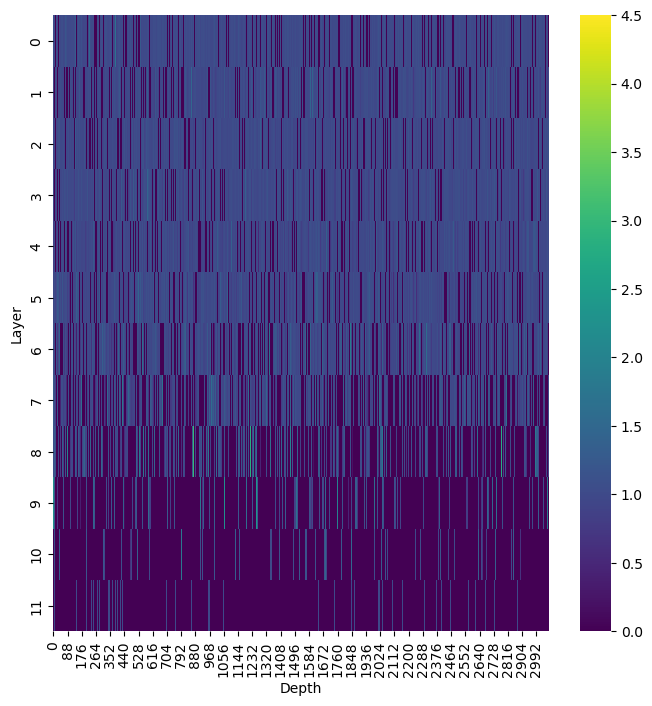

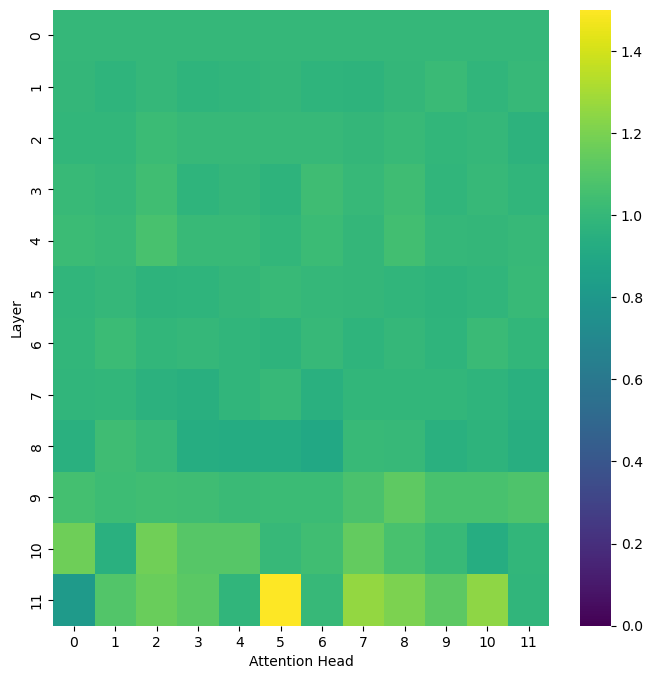

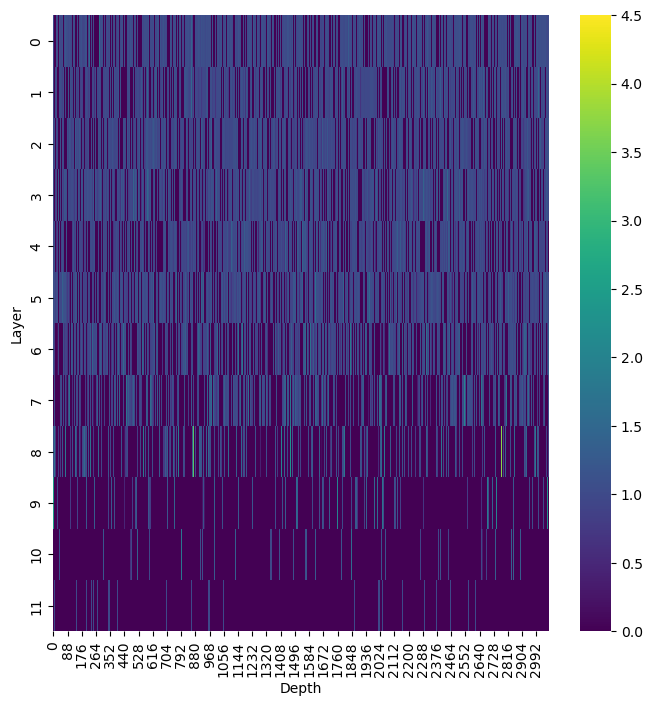

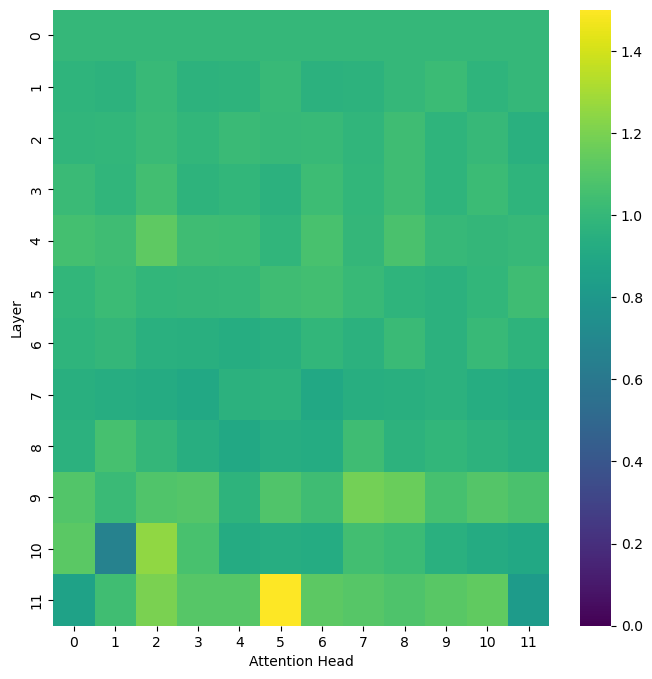

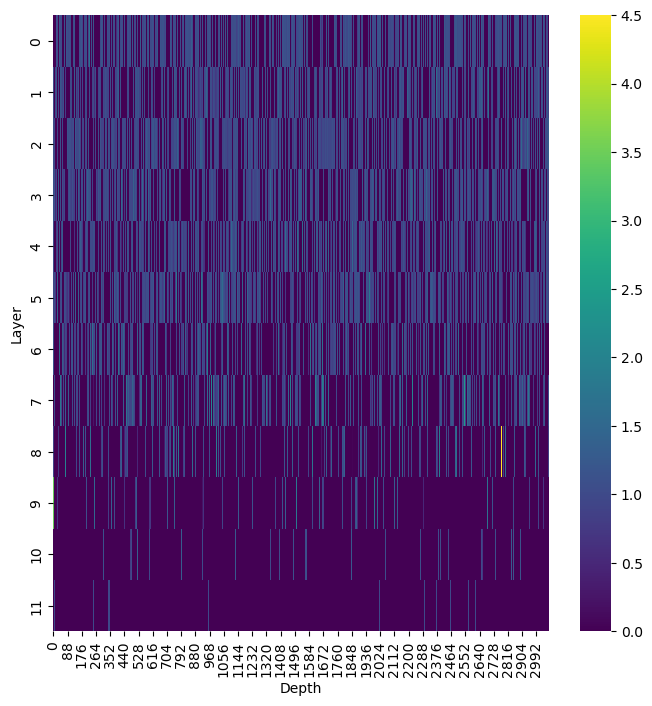

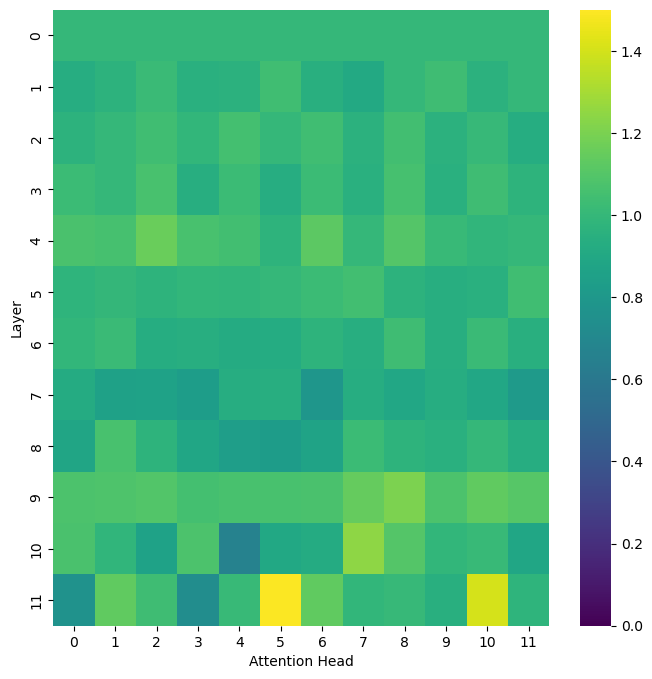

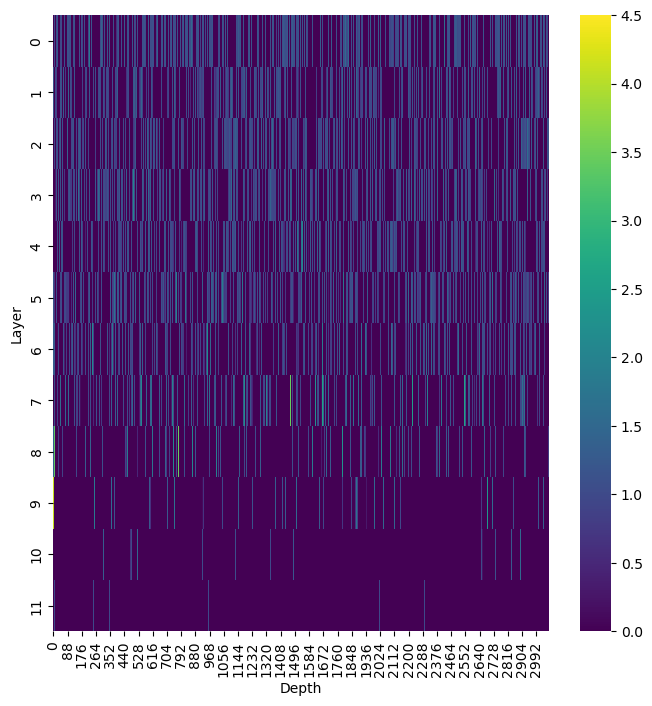

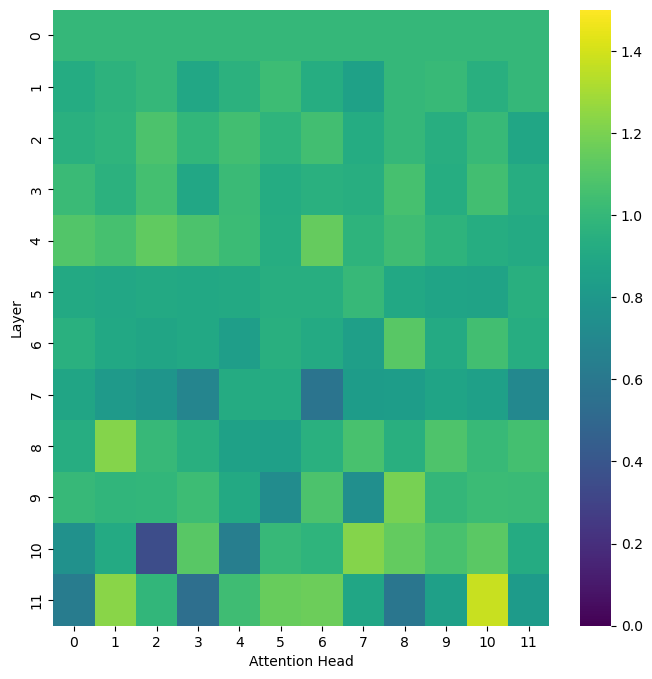

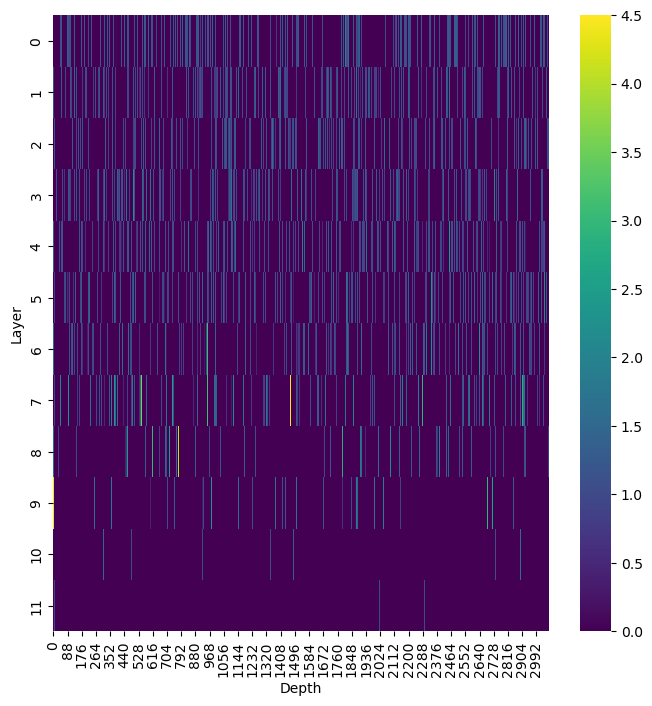

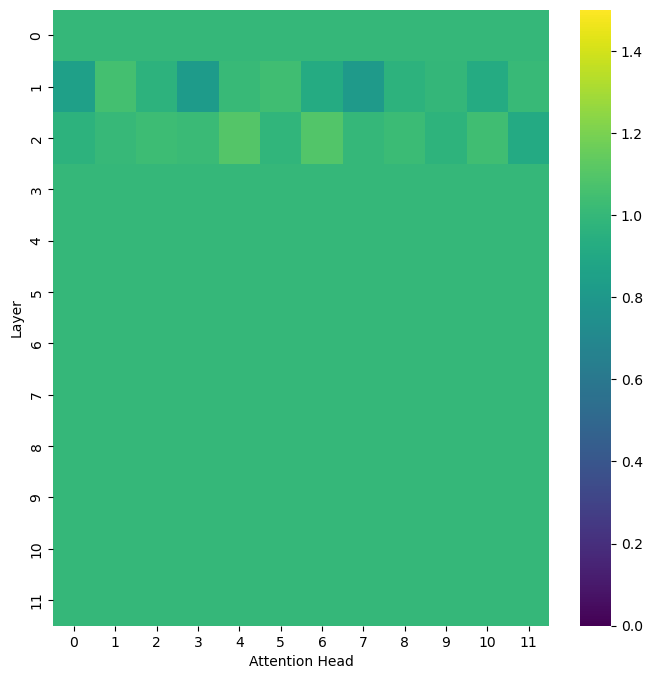

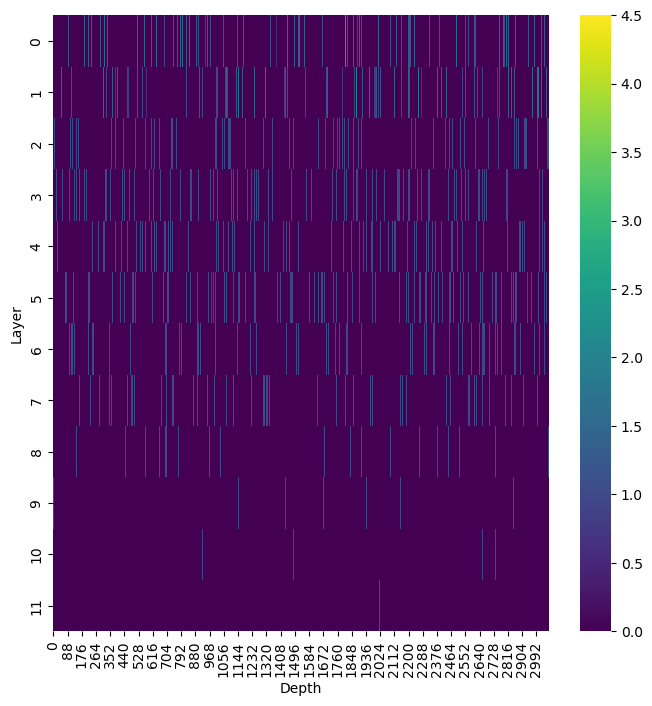

In [4]:
name_iter = ["10", "20", "30", "40", "50", "60", "70", "80", "90"]

frames_neuron = []
frames_head = []
for prune_perc in name_iter:
    folder = prune_perc+"Pruned"

    head_mask = torch.load(folder+"/head_mask.pt").cpu().numpy()
    neuron_mask = torch.load(folder+"/neuron_mask.pt").cpu().numpy()

    plt.figure(figsize=(8,8))
    ax = sns.heatmap(head_mask, cmap="viridis", vmin=0, vmax=1.5)

    plt.xlabel("Attention Head")
    plt.ylabel("Layer")
    plt.savefig("attention_"+prune_perc+"_heatmap.jpg")

    plt.figure(figsize=(8,8))
    ax = sns.heatmap(neuron_mask, cmap="viridis", vmin=0, vmax=4.5)
    plt.xlabel("Depth")
    plt.ylabel("Layer")
    plt.savefig("ffn_"+prune_perc+"_heatmap.jpg")

    frames_neuron.append(Image.open("ffn_"+prune_perc+"_heatmap.jpg"))
    frames_head.append(Image.open("attention_"+prune_perc+"_heatmap.jpg"))

frames_neuron[0].save('neuron_mask.gif', format='GIF',
                      append_images=frames_neuron[1:],
                      save_all=True,
                      duration=100)

frames_head[0].save('head_mask.gif', format='GIF',
                      append_images=frames_head[1:],
                      save_all=True,
                      duration=100)

    